# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [181]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

# play styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [182]:
energy_df = pd.read_csv('Energy.csv')

In [183]:
energy_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


Text(0.5,0,'Heating Load')

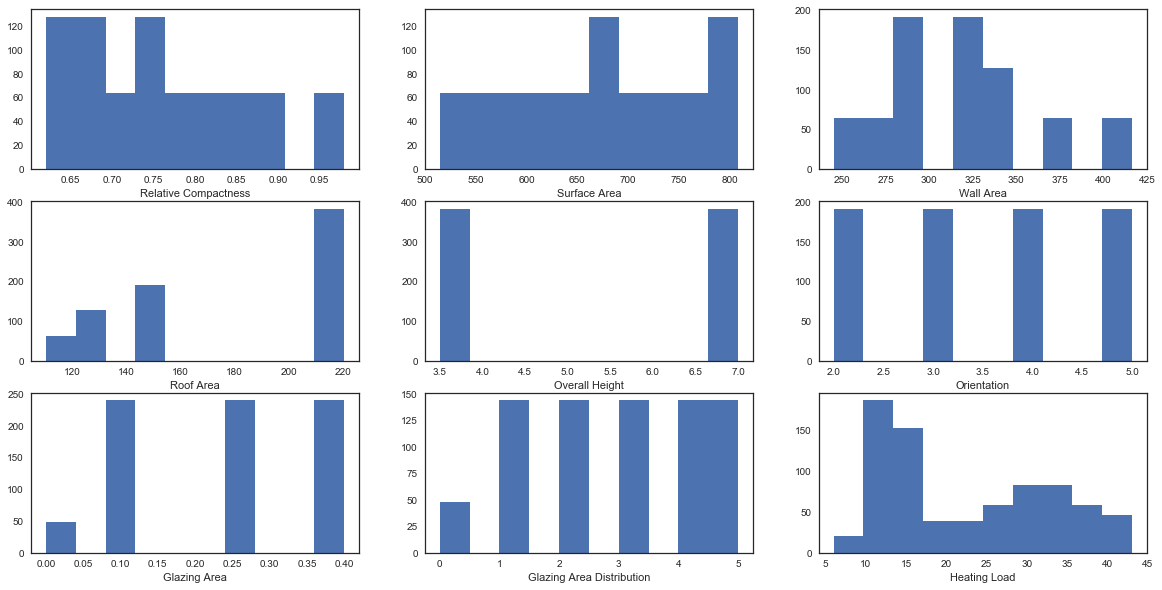

In [184]:
f, ax = plt.subplots(3,3,figsize = (20,10))

ax1 = plt.subplot(3,3,1)
ax1.hist(energy_df["X1"])
ax1.set_xlabel("Relative Compactness")

ax2 = plt.subplot(3,3,2)
ax2.hist(energy_df["X2"])
ax2.set_xlabel("Surface Area")

ax3 = plt.subplot(3,3,3)
ax3.hist(energy_df["X3"])
ax3.set_xlabel("Wall Area")

ax4 = plt.subplot(3,3,4)
ax4.hist(energy_df["X4"])
ax4.set_xlabel("Roof Area")

ax5 = plt.subplot(3,3,5)
ax5.hist(energy_df["X5"])
ax5.set_xlabel("Overall Height")

ax6 = plt.subplot(3,3,6)
ax6.hist(energy_df["X6"])
ax6.set_xlabel("Orientation")

ax7 = plt.subplot(3,3,7)
ax7.hist(energy_df["X7"])
ax7.set_xlabel("Glazing Area")

ax8 = plt.subplot(3,3,8)
ax8.hist(energy_df["X8"])
ax8.set_xlabel("Glazing Area Distribution")

ax9 = plt.subplot(3,3,9)
ax9.hist(energy_df["Y1"])
ax9.set_xlabel("Heating Load")

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [185]:
# check the number of NaN value in the dataframe
energy_df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

In [186]:
EX = energy_df.drop("Y1", axis = 1)
EY = energy_df["Y1"]

In [187]:
from sklearn.model_selection import train_test_split
ex_train, ex_test, ey_train, ey_test = train_test_split(EX, EY, test_size = 0.15, random_state = 100)
print ('Number of samples in training data:',len(ex_train))
print ('Number of samples in validation data:',len(ex_test))


Number of samples in training data: 652
Number of samples in validation data: 116


In [262]:
from sklearn import linear_model

ene_lireg = linear_model.LinearRegression()

print("Training a Linear Regression Model..")
ene_lireg.fit(ex_train,ey_train)

# print the intercept and the coefficients

coeff_list = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", \
              "Glazing Area", "Glazing Area Distribution"]
print("Intercept:", ene_lireg.intercept_)
print()
print("Coeffiecients for X1 to X8:")
for i,coeff in enumerate(ene_lireg.coef_):
    print(coeff_list[i], ": ", coeff)

Training a Linear Regression Model..
Intercept: 75.0961109706

Coeffiecients for X1 to X8:
Relative Compactness :  -60.5426731955
Surface Area :  248898603421.0
Wall Area :  -248898603421.0
Roof Area :  -497797206842.0
Overall Height :  4.33485674858
Orientation :  0.0185587629676
Glazing Area :  20.0668307384
Glazing Area Distribution :  0.235076511279



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [263]:
# training error
Tr_pred = ene_lireg.predict(ex_train)
print("Tranning error (Root Mean Square): ", np.sqrt(np.mean((Tr_pred-ey_train)**2)))

Te_pred = ene_lireg.predict(ex_test)
print("Test error (Root Mean Square): ", np.sqrt(np.mean((Te_pred-ey_test)**2)))


Tranning error (Root Mean Square):  2.92794825404
Test error (Root Mean Square):  2.87513191559



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [264]:
# There are some requirements when choosing the data? like the 200 data are
# based on the first 100 and add 100 more random data?
len_train = 652
Tr_err = []
Te_err = []
# used to  store the train data 100, 200 ...
X_train_store = [] 
Y_train_store = []
ex_train, ex_test, ey_train, ey_test = train_test_split(EX, EY, test_size = 0.15, random_state = 100)

Ex_train = ex_train.copy()
Ey_train = ey_train.copy()
# print(type(Ex_train), type(Ey_train))
for i in np.arange(1,7,1):
    if i < 6:
        x_train, x_test, y_train, y_test = train_test_split(Ex_train, Ey_train, test_size = (len_train-i*100)/len_train,random_state = 100)
#    concatenate the train data 
        if len(X_train_store) > 0:
            X_train_store.append(x_train)
            Y_train_store.append(y_train)
            x_train = pd.concat(x_train)
            y_train = pd.concat(y_train)
    else:
        x_train, x_test, y_train, y_test = train_test_split(EX, EY,test_size = 0.15, random_state = 100)

    ene_lireg.fit(x_train,y_train)
    tr_pred = ene_lireg.predict(x_train)
    te_pred = ene_lireg.predict(x_test)
#     append each Training error and testing error
    Tr_err.append(np.sqrt(np.mean((tr_pred-y_train)**2)))
    Te_err.append(np.sqrt(np.mean((te_pred-y_test)**2)))
    
#   store the train data
#     X_train_store.append(x_train)
#     Y_train_store.append(y_train)
#     update the train data, 
#     print(list(Ex_train.index))
    if i < 6:
        Ex_train.drop(index = x_train.index, inplace = True)
#     print(type(Ex_train), type(Ey_train))
        Ey_train.drop(index = y_train.index, inplace = True)


# ex_train, ex_test, ey_train, ey_test = train_test_split(EX, EY, test_size = 0.15, random_state = 100)



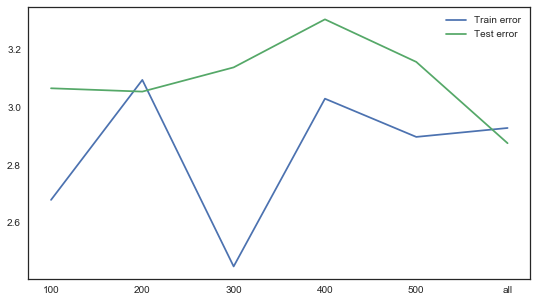

In [265]:
f = plt.plot(figsize=(10,8))
plt.plot(np.arange(1,7,1),Tr_err, label = "Train error")
plt.plot(np.arange(1,7,1), Te_err, label = "Test error")

# labels = [item.get_text() for item in f.get_xticklabels()]
labels = [100,200,300,400,500,"all"]
plt.xticks(np.arange(1,7,1),labels)
plt.legend()

The relation between the size of training data and the train error is not clear, since the train error fluctuates with size.

But the test error increased first then dropped rapidly after the number of 400. It means the more training data was used to calibrate, the more accurate model could be obtained, as long as the number of test data is fixed.


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [266]:
bins = [-math.inf, 15, 30, math.inf]
labels = [0, 1, 2]
energy_df["label"] = pd.cut(energy_df["Y1"], bins, labels = labels)

In [267]:
X2 = energy_df.drop(["Y1","label"], axis = 1)
Y2 = energy_df["label"]

In [268]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))


Number of samples in training data: 652
Number of samples in validation data: 116


In [272]:
ene_logreg = linear_model.LogisticRegression(C=1e5)


print("Training a logistic Regression Model...")
ene_logreg.fit(x_train, y_train)

Training a logistic Regression Model...


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [273]:
# how to define the accuracy?
training_accuracy = ene_logreg.score(x_train, y_train)
print("Training Accuracy:", training_accuracy)

validation_accuracy = ene_logreg.score(x_test,y_test)
print("Validation Accuracy:", validation_accuracy)

Training Accuracy: 0.829754601227
Validation Accuracy: 0.827586206897


In [274]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = ene_logreg.predict(x_test)
cf = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Pred 0',1,2],
                  index=['Act 0',1,2])
print ('Confusion matrix of test data is:')
display(cf)


Confusion matrix of test data is:


,Pred 0,1,2
Act 0,38,2,0
1,9,35,6
2,0,3,23


__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [275]:
# when you scale the train data, you need to perform the same scaling to the
# test data
from sklearn import preprocessing

X2 = energy_df.drop(["Y1","label"], axis = 1)
Y2 = energy_df["label"]
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.15, random_state=100)

# seperate the train data and test data first?
min_max_scaler = preprocessing.MinMaxScaler()
print("Transforming the train data and the test data")
X_train_minmax = min_max_scaler.fit_transform(x_train)
X_test_minmax = min_max_scaler.transform(x_test)

Transforming the train data and the test data


In [276]:
ene_logreg2 = linear_model.LogisticRegression(C=1e5)


print("Training a logistic Regression Model...")
ene_logreg2.fit(X_train_minmax, y_train)

Training a logistic Regression Model...


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [277]:
training_accuracy = ene_logreg2.score(X_train_minmax, y_train)
print("Training Accuracy:", training_accuracy)

validation_accuracy = ene_logreg2.score(X_test_minmax, y_test)
print("Validation Accuracy:", validation_accuracy)

Training Accuracy: 0.820552147239
Validation Accuracy: 0.827586206897


In [278]:
# confusion matrix

y_true = y_test
y_pred = ene_logreg2.predict(X_test_minmax)
cf2 = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Pred 0',1,2],
                  index=['Act 0',1,2])
print ('Confusion matrix of test data is:')
display(cf2)

Confusion matrix of test data is:


,Pred 0,1,2
Act 0,35,5,0
1,6,39,5
2,0,4,22


After the min max scale, the accuracy is nearly the same with before, slightly worse.

And from the confusion matrix we can see the model after scaling did better in predicting the 0(low heating load), but worse in predicting the other 2.

## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [279]:
diabetes_df = pd.read_csv("diabetesdata.csv")
diabetes_df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


In [280]:
diabetes_df.isnull().sum()

TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64

In [281]:
diabetes_df["glucoseLevel"].fillna(diabetes_df["glucoseLevel"].dropna().mean(),inplace = True)
diabetes_df["Age"].fillna(diabetes_df["Age"].dropna().mean(),inplace = True)
diabetes_df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.000000,72,0,33.6,0.627,50.000000,1
1,1,121.016349,66,0,26.6,0.351,31.000000,0
2,8,183.000000,64,0,23.3,0.672,33.353741,1
3,1,121.016349,66,94,28.1,0.167,21.000000,0
4,0,137.000000,40,168,43.1,2.288,33.000000,1


In [282]:
X3 = diabetes_df.drop("IsDiabetic", axis = 1)
Y3 = diabetes_df["IsDiabetic"]
x_train, x_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=100)


In [206]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_tr_log = round(logreg.score(x_train, y_train)*100,2)
acc_te_log = round(logreg.score(x_test, y_test)*100, 2)
print("Train Accuracy:", acc_tr_log)
print("Test Accuracy:", acc_te_log)

Train Accuracy: 78.34
Test Accuracy: 73.38


In [207]:
# support vector machines
# how to score the support vector machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_tr_svc = round(svc.score(x_train, y_train)*100, 2)
acc_te_svc = round(svc.score(x_test, y_test)*100, 2)
print("Train Accuracy:", acc_tr_svc)
print("Test Accuracy:", acc_te_svc)

Train Accuracy: 100.0
Test Accuracy: 65.58


In [208]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)

acc_tr_per = round(perceptron.score(x_train, y_train)*100, 2)
acc_te_per = round(perceptron.score(x_test, y_test)*100, 2)
print("Train Accuracy:", acc_tr_per)
print("Test Accuracy:", acc_te_per)


Train Accuracy: 64.17
Test Accuracy: 64.29


In [209]:
#  kNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

acc_tr_knn = round(knn.score(x_train, y_train)*100, 2)
acc_te_knn = round(knn.score(x_test, y_test)*100, 2)
print("Train Accuracy:", acc_tr_knn)
print("Test Accuracy:", acc_te_knn)


Train Accuracy: 85.34
Test Accuracy: 67.53


In [283]:
# XGBoost
import xgboost as xgb
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(x_train, y_train)
y_pred = gradboost.predict(x_test)

acc_tr_xgb = round(gradboost.score(x_train, y_train)*100, 2)
acc_te_xgb = round(gradboost.score(x_test, y_test)*100, 2)
print("Train Accuracy:", acc_tr_xgb)
print("Test Accuracy:", acc_te_xgb)


ModuleNotFoundError: No module named 'xgboost'

In [284]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_tr_rnd = round(random_forest.score(x_train, y_train) * 100, 2)
acc_te_rnd = round(random_forest.score(x_test, y_test) * 100, 2)
print("Train Accuracy:", acc_tr_rnd)
print("Test Accuracy:", acc_te_rnd)

Train Accuracy: 100.0
Test Accuracy: 72.08




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [285]:
diabetes_df["BPBand"] = pd.cut(diabetes_df["BP"], 3, labels = [0, 1, 2])
diabetes_df["BMIBand"] = pd.cut(diabetes_df["BMI"], 3, labels = [0, 1, 2])
diabetes_df["PedigreeBand"] = pd.cut(diabetes_df["Pedigree"], 3, labels = [0, 1, 2])

In [286]:
display(diabetes_df[["BPBand","IsDiabetic"]].groupby(["BPBand"], as_index = False).mean().sort_values(by = "BPBand", ascending = True))
display(diabetes_df[["BMIBand", "IsDiabetic"]].groupby(["BMIBand"], as_index = False).mean().sort_values(by = "BMIBand", ascending = True))
display(diabetes_df[["PedigreeBand", "IsDiabetic"]].groupby(["PedigreeBand"], as_index = False).mean().sort_values(by = "PedigreeBand", ascending = True))

,BPBand,IsDiabetic
0,0,0.450000
1,1,0.307282
2,2,0.466667


,BMIBand,IsDiabetic
0,0,0.039216
1,1,0.358297
2,2,0.611111


,PedigreeBand,IsDiabetic
0,0,0.327007
1,1,0.540541
2,2,0.444444


People with normal blood pressure tends to have less risk of getting diabetes. People who are obese are more likely to get diabetes. It seems there is no direct relation between diabetes between pedigree.


__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [214]:
diabetes_df2 = pd.read_csv("diabetesdata.csv")


diabetes_df2["BPBand"] = pd.cut(diabetes_df["BP"], 3, labels = [0, 1, 2])
diabetes_df2["BMIBand"] = pd.cut(diabetes_df["BMI"], 3, labels = [0, 1, 2])
diabetes_df2["PedigreeBand"] = pd.cut(diabetes_df["Pedigree"], 3, labels = [0, 1, 2])

X4 = diabetes_df2.drop("IsDiabetic", axis = 1)
Y4 = diabetes_df2["IsDiabetic"]

x_train, x_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=100)
combine = [x_train, x_test]
x_train.shape, x_test.shape

((614, 10), (154, 10))

In [215]:
guess_ages = np.zeros((3,3), dtype = int)
guess_glucoseLevel = np.zeros((3,3), dtype = float)

In [287]:
#  store the new dataframe after filling the NaN value
combine2 = []
for idx, dataset in enumerate(combine.copy()):
    if idx == 0:
        print("Working on Training Data set\n")
    else:
        print("-"*35)
        print("Working on Test Data set\n")
        
    print("Guess values of age and glucoseLevel based on BMI and BP...")
    for i in range(0,3):
        for j in range(0,3):
            guess_df1 = dataset[(dataset["BMIBand"] == i)&(dataset["BPBand"] == j)]["Age"].dropna()
            guess_df2 = dataset[(dataset["BPBand"] == i)&(dataset["PedigreeBand"] == j)]["glucoseLevel"].dropna()

#           get the median age and glucoseLevel of the group
#           in case no return in the guess dataframe
            if not len(guess_df1) == 0:
                age_guess  = guess_df1.median()
            else:
                age_guess = 0
            
            if not len(guess_df2) == 0:
                glu_guess = guess_df2.median()
            else:
                glu_guess = 0
                
                
            guess_ages[i,j] = int(age_guess)
            guess_glucoseLevel[i,j] = glu_guess
    
    print('Guess_Age table:\n',guess_ages)
    print('Guess_glucoseLevel table:\n',guess_glucoseLevel)    
    print ('\nAssigning age values to NAN age values in the dataset...')
    
    for i in range(0,3):
        for j in range(0,3):
            Series1 = dataset.loc[(dataset.Age.isnull()) & (dataset.BMIBand == i) & (dataset.BPBand == j),\
                       ]["Age"]
            if not len(Series1) == None:
#                 you need to put the "age" inside, or what you replace is not in the dataframe
                dataset.loc[(dataset.Age.isnull()) & (dataset.BMIBand == i) & (dataset.BPBand == j)\
                       ,"Age"] = guess_ages[i,j]
            
            Series2 = dataset.loc[(dataset.glucoseLevel.isnull()) & (dataset.BPBand == i) & (dataset.PedigreeBand == j),\
                       ]["glucoseLevel"]
            if not len(Series2) == None:
                dataset.loc[(dataset.glucoseLevel.isnull()) & (dataset.BPBand == i) & (dataset.PedigreeBand == j)\
                       ,"glucoseLevel"] = guess_glucoseLevel[i,j]
            
#     dataset["Age"] = dataset["Age"].astype(int)
    print()
print("Done")


Working on Training Data set

Guess values of age and glucoseLevel based on BMI and BP...
Guess_Age table:
 [[24 25 55]
 [29 29 37]
 [40 32 31]]
Guess_glucoseLevel table:
 [[ 114.5  127.5  137. ]
 [ 112.   118.   149. ]
 [ 136.   125.5  159.5]]

Assigning age values to NAN age values in the dataset...

-----------------------------------
Working on Test Data set

Guess values of age and glucoseLevel based on BMI and BP...
Guess_Age table:
 [[25 24  0]
 [37 26 37]
 [26 27 23]]
Guess_glucoseLevel table:
 [[ 115.     0.     0. ]
 [ 112.   111.     0. ]
 [ 126.   145.5    0. ]]

Assigning age values to NAN age values in the dataset...

Done




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [288]:
# change the glucoseLevel and age to categorical variables
for dataset in combine:
    dataset["AgeBand"] = pd.cut(dataset["Age"], 5, labels = [0,1,2,3,4])
    dataset["GluBand"] = pd.cut(dataset["glucoseLevel"], 5, labels = [0,1,2,3,4])

x_train_re = combine[0].drop(["glucoseLevel", "BP", "BMI", "Pedigree", "Age"], axis = 1)
x_test_re = combine[1].drop(["glucoseLevel", "BP", "BMI", "Pedigree", "Age"], axis = 1)


In [240]:
# percetron
perceptron2 = Perceptron()
perceptron2.fit(x_train_re, y_train)
y_pred = perceptron2.predict(x_test_re)

acc_tr_per2 = round(perceptron.score(x_train_re, y_train)*100, 2)
acc_te_per2 = round(perceptron.score(x_test_re, y_test)*100, 2)
print("Train Accuracy:", acc_tr_per2)
print("Test Accuracy:", acc_te_per2)


Train Accuracy: 37.95
Test Accuracy: 42.21


In [241]:
# logistic regression
logreg2 = LogisticRegression()
logreg2.fit(x_train_re, y_train)
y_pred = logreg.predict(x_test_re)

acc_tr_log2 = round(logreg.score(x_train_re, y_train)*100,2)
acc_te_log2 = round(logreg.score(x_test_re, y_test)*100, 2)
print("Train Accuracy:", acc_tr_log2)
print("Test Accuracy:", acc_te_log2)

Train Accuracy: 68.08
Test Accuracy: 65.58


In [242]:
# Random Forest
random_forest2 = RandomForestClassifier(n_estimators=1000)
random_forest2.fit(x_train_re, y_train)
y_pred = random_forest.predict(x_test_re)

acc_tr_rnd2 = round(random_forest.score(x_train_re, y_train) * 100, 2)
acc_te_rnd2 = round(random_forest.score(x_test_re, y_test) * 100, 2)
print("Train Accuracy:", acc_tr_rnd2)
print("Test Accuracy:", acc_te_rnd2)

Train Accuracy: 67.92
Test Accuracy: 68.18


__ Conclusion: __Apparently, the Random Forest and Logistic Regression perform better than the perceptron method.

However, after the variables were transfromed to categorical variables, the accuracies are worse than before.

### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

# Proof
__i. __ The error can be express as
$$ Q(a,b) = \sum_{i=1}^{n}(y_i-(a+bx_i))^2 $$
To get the minimize the error $ Q(a,b)$, we need to take the derivative:
$$\frac{\partial Q}{\partial b} = -2 \sum_{i=1}^{n}(y_i - b - ax_i) = 0\\
\frac{\partial Q}{\partial a} = -2 \sum_{i=1}^{n}(y_i - b - ax_i)x_i = 0
$$
Then we have
$$
nb + n\bar{x}a = n\bar{y}\\
n\bar{x}b + (\sum_{i=1}^{n}x_i^{2})a = \sum_{i=1}^{n}x_iy_i
$$
Solve the equations above, then we get:
$$
\hat{b} = \bar{y} - \hat{a}\bar{x}\\
\hat{a} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$


__ ii. __
$$
\hat{a} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{S_x^2} = \frac{S_y}{S_x} \times \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{S_x S_y}
$$

Take $\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{S_x S_y}$ as the correlation coefficient $r$

Therefore, $\hat{a}$ can be expressed by:
$$
\hat{a} = r(\frac{S_y}{S_x})
$$

# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.debates.org/index.php?page=debate-transcripts


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [85]:
import requests
import bs4 as bs
from collections import Counter
import re
import operator

In [86]:
source = requests.get("http://www.debates.org/index.php?page=debate-transcripts")
soup = bs.BeautifulSoup(source.content, features = "html.parser")

In [87]:
#  1. get the links we want

links = soup.find_all("a")
link_dict = {}
for l in links:

    if ("First" in l.text) & ("Presidential" in l.text) & ("Debate" in l.text):
        print("Info about {}: ".format(l.text))
        print(l.get("href"))
        link_dict[l.text] = l.get("href")

Info about October 3, 2012: The First Obama-Romney Presidential Debate: 
http://www.debates.org/index.php?page=october-3-2012-debate-transcript
Info about September 26, 2008: The First McCain-Obama Presidential Debate: 
http://www.debates.org/index.php?page=2008-debate-transcript
Info about September 30, 2004: The First Bush-Kerry Presidential Debate: 
http://www.debates.org/index.php?page=september-30-2004-debate-transcript
Info about October 3, 2000: The First Gore-Bush Presidential Debate: 
http://www.debates.org/index.php?page=october-3-2000-transcript
Info about October 6, 1996: The First Clinton-Dole Presidential Debate: 
http://www.debates.org/index.php?page=october-6-1996-debate-transcript
Info about September 25, 1988: The First Bush-Dukakis Presidential Debate: 
http://www.debates.org/index.php?page=september-25-1988-debate-transcript
Info about October 7, 1984: The First Reagan-Mondale Presidential Debate: 
http://www.debates.org/index.php?page=october-7-1984-debate-transcri

In [291]:
# 2. Get the information inside
debate_df = pd.DataFrame(columns = ["Debate Name", "text_length", "war_count", "most_common_w", "most_common_w_count"])

name = []
text_length = []
count = []
words = []
words_count = []
for i,l in enumerate(link_dict):
    
#     get the href
    url = link_dict[l]
#     print(url)
    debate_source = requests.get(url)
    debate_soup = bs.BeautifulSoup(debate_source.content, features = "html.parser")
#     replace the whitespace, not included 
    pro_text = debate_soup.text.strip().replace(r'\s', " ")

#     what is wrong with the regular expression here? Can only use re.findall?
    war_count = len(re.findall(r"war[^\w]?[s ]", pro_text.lower()))


#     return a dictionary of the count of each word
    counts = Counter(re.findall(r"[\w']+", pro_text.lower()))
#   sort the counts of the words and return a list of tuple
    sort_counts = sorted(counts.items(), key = operator.itemgetter(1), reverse = True)
    most_commom_w = sort_counts[0][0]
    most_common_w_count = sort_counts[0][1]

#   store the value in the list
    name.append(l)
    words.append(most_commom_w)
    words_count.append(most_common_w_count)
    text_length.append(len(pro_text))
    count.append(war_count)
    
# put it in the dataframe
debate_df["Debate Name"] = name
debate_df["text_length"] = text_length
debate_df["war_count"] = count
debate_df["most_common_w_count"] = words_count
debate_df["most_common_w"] = words
# why there are 2 columns of mos_common_words?                 
    

In [292]:
debate_tf_T = debate_df.T
display(debate_tf_T)

,0,1,2,3,4,5,6,7,8
Debate Name,"October 3, 2012: The First Obama-Romney Presid...","September 26, 2008: The First McCain-Obama Pre...","September 30, 2004: The First Bush-Kerry Presi...","October 3, 2000: The First Gore-Bush President...","October 6, 1996: The First Clinton-Dole Presid...","September 25, 1988: The First Bush-Dukakis Pre...","October 7, 1984: The First Reagan-Mondale Pres...","September 23, 1976: The First Carter-Ford Pres...","September 26, 1960: The First Kennedy-Nixon Pr..."
text_length,97939,185262,85560,93895,95926,90570,89831,83671,63847
war_count,5,44,61,11,15,14,3,5,3
most_common_w,the,the,the,the,the,the,the,the,the
most_common_w_count,758,1471,858,920,877,805,868,858,780


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [100]:
people_source = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/").content
people_soup = bs.BeautifulSoup(people_source, "html.parser")

In [130]:
links = people_soup.find_all("a")

# get the position of the x01.txt
for i,l in enumerate(links):
    if l.text == "x01.txt":
        start = i
        break

author = []
for i in range(start,start+27,1):
    href = links[i].get("href")
    text = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/{}"\
                       .format(href)).content
    author.append(text.splitlines()[4])


[b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    R J Freund and P D Minton,',
 b'#    D G Kleinbaum and L L Kupper,',
 b'#    Helmut Spaeth,',
 b'#    D G Kleinbaum and L L Kupper,',
 b'#    K A Brownlee,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    S Chatterjee and B Price,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    R J Freund and P D Minton,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    Helmut Spaeth,',
 b'#    S Chatterjee, B Price,',
 b'#    S Chatterjee, B Price,',
 b'#    S Chatterjee, B Price,',
 b'#    S C Narula, J F Wellington,',
 b'#    S C Narula, J F Wellington,']

In [178]:
# get the clean format of the name
author_str = []
for name in author:
    name_clean = re.sub(r'[^\w ]', "", name.decode("utf-8").strip())[4:]
    author_str.append(name_clean)


In [167]:
# count the occurences of the name

count_ref = Counter(author_str)
count_dict = dict(count_ref)

# create the dataframe using the dictionary got above and sort the values
count_df = pd.DataFrame(columns = ["Authors", "Counts"])
count_df["Authors"] = count_dict.keys()
count_df["Counts"] = count_dict.values()
count_df.set_index("Authors", inplace = True)
count_df.sort_values("Counts", inplace = True, ascending = False)

display(count_df)

,Counts
Authors,
Helmut Spaeth,16
S Chatterjee B Price,3
R J Freund and P D Minton,2
D G Kleinbaum and L L Kupper,2
S C Narula J F Wellington,2
K A Brownlee,1
S Chatterjee and B Price,1
